# Reconnaissance de chiffres manuscrits avec PCA et SVM

### Importation des bibliothèques

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

### Chargement du dataset MNIST

In [12]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(int)

c:\Program Files\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Normalisation des données

In [13]:
X /= 255.0

### Réduction de dimension avec PCA (50 composantes principales)

In [14]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)


### Réduction de dimension avec PCA (10 composantes principales)

In [15]:
pca2 = PCA(n_components=10)
X_pca2 = pca2.fit_transform(X)

### Séparation des données en ensemble d'entraînement et de test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca2, y, test_size=0.2, random_state=42)

### Entraînement du modèle SVM avec noyau RBF

In [17]:
svm_model = SVC(kernel='rbf', C=10) 
svm_model.fit(X_train, y_train)

SVC(C=10)

### Entraînement du modèle SVM avec noyau RBF sur les données modifiées 

In [18]:
svm_model2 = SVC(kernel='rbf', C=10) 
svm_model2.fit(X_train2, y_train2)

SVC(C=10)

### Prédictions et évaluation du modèle

In [19]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVM après PCA): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Test Accuracy (SVM après PCA): 98.54%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.98      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



### Prédictions et évaluation du modèle avec les paramètres modifiés 

In [20]:
y_pred2 = svm_model2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Test Accuracy (SVM après PCA): {accuracy2 * 100:.2f}%")
print(classification_report(y_test2, y_pred2))

Test Accuracy (SVM après PCA): 94.42%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.96      1380
           3       0.92      0.91      0.92      1433
           4       0.92      0.94      0.93      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.96      0.96      0.96      1503
           8       0.91      0.91      0.91      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



### Visualisation en 2D si PCA réduit à 2 composantes

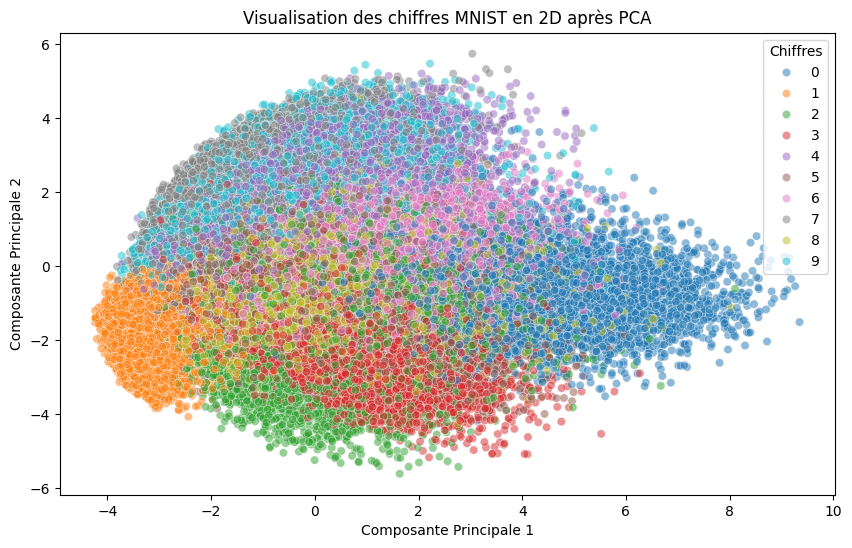

In [21]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Visualisation des chiffres MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()
